In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import *
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

In [91]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample = pd.read_csv('sample_submission.csv')

In [92]:
#First Normalize or scale the data
#Construct a mlp model
#Fit and then predict
y = data['label']
data1 = data.drop('label',axis=1)


In [93]:
#Scaling must be done after train test split
data1.shape

(42000, 784)

In [94]:
x_train, x_val, y_train, y_val = train_test_split(data1,y,test_size=0.3,random_state=42)

In [95]:
scale = MinMaxScaler()
scaled = scale.fit_transform(x_train)
scaled_val = scale.transform(x_val)
scale_test = scale.transform(data_test)

In [96]:
#Change y categories into binary using one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)

In [97]:
print(y_train[:10])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [98]:
x_train.shape

(29400, 784)

In [99]:
model=Sequential()
model.add(Dense(784,input_shape=(784,),activation='relu'))
model.add(Dense(392,activation='relu'))
model.add(Dense(196,activation='relu'))
model.add(Dense(98,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')


In [100]:
model.fit(scaled,y_train, epochs=10, batch_size=64,validation_data=(scaled_val,y_val))

Epoch 1/10
460/460 [==============================] - 3s 7ms/step - loss: 0.3307 - val_loss: 0.1678
Epoch 2/10
460/460 [==============================] - 3s 7ms/step - loss: 0.1208 - val_loss: 0.1107
Epoch 3/10
460/460 [==============================] - 3s 7ms/step - loss: 0.0838 - val_loss: 0.1128
Epoch 4/10
460/460 [==============================] - 3s 7ms/step - loss: 0.0635 - val_loss: 0.1036
Epoch 5/10
460/460 [==============================] - 3s 8ms/step - loss: 0.0519 - val_loss: 0.1069
Epoch 6/10
460/460 [==============================] - 3s 7ms/step - loss: 0.0418 - val_loss: 0.1102
Epoch 7/10
460/460 [==============================] - 3s 7ms/step - loss: 0.0365 - val_loss: 0.1166
Epoch 8/10
460/460 [==============================] - 3s 7ms/step - loss: 0.0341 - val_loss: 0.1089
Epoch 9/10
460/460 [==============================] - 3s 7ms/step - loss: 0.0264 - val_loss: 0.1314
Epoch 10/10
460/460 [==============================] - 3s 7ms/step - loss: 0.0309 - val_loss: 0.1081

In [101]:
losses = pd.DataFrame(model.history.history)


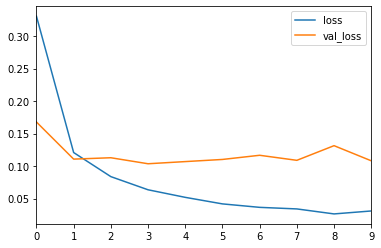

In [102]:
losses.plot()

In [103]:
scale_test.shape

(28000, 784)

In [104]:
pred = model.predict(scale_test)

In [105]:
#pick out the highest value(probability)
results = np.argmax(pred,axis = 1)

In [106]:
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [107]:
pred.shape

(28000, 10)

In [108]:
result = pd.Series(results,name='Label')

In [109]:
result

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [110]:
a = range(1,28001)
submission= pd.DataFrame({
    'ImageId': a,
    'Label': result
})
#submission.set_index('ImageId',inplace=True)
submission.to_csv('submission2.csv',index=False)